# Get Cryptocurrency Data

Link: [https://www.youtube.com/watch?v=4-CC3u4i73k](https://www.youtube.com/watch?v=4-CC3u4i73k)

In [2]:
import pandas as pd
import datetime as dt
import time as t
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI

In [3]:
# create a client
cg = CoinGeckoAPI()

# confirm connection
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [4]:
# get a list of coins, sort df by id
coinList = cg.get_coins_list()
coinDataFrame=pd.DataFrame.from_dict(coinList).sort_values('id').reset_index(drop=True)

In [6]:
coinDataFrame

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
9889,zynergy,zyn,Zynergy
9890,zyro,zyro,Zyro
9891,zyrri,zyr,Zyrri
9892,zyx,zyx,ZYX


In [10]:
coins = ['bitcoin','ethereum','litecoin']

In [11]:
# get a list of suppored VS currencies
counterCurrencies = cg.get_supported_vs_currencies()
vsCurrencies=['usd','eur','link']

In [12]:
# most simple price request - nested dictionary format
simplePriceRequest = cg.get_price(ids=coins, vs_currencies ='usd')
simplePriceRequest

{'bitcoin': {'usd': 30306},
 'ethereum': {'usd': 1869.66},
 'litecoin': {'usd': 95.02}}

In [14]:
complexPriceRequest = cg.get_price(ids=coins,
                                   vs_currencies= vsCurrencies,
                                   include_market_cap= True,
                                   include_24hr_vol = True,
                                   include_24hr_change= True,
                                   include_last_updated_at=True
                                   )

In [15]:
complexPriceRequest

{'bitcoin': {'usd': 30300,
  'usd_market_cap': 588757083617.7759,
  'usd_24h_vol': 9559793797.775566,
  'usd_24h_change': -0.21138090153086805,
  'eur': 27592,
  'eur_market_cap': 536452493066.25555,
  'eur_24h_vol': 8705415906.48077,
  'eur_24h_change': -0.3243417146737703,
  'link': 4931,
  'link_market_cap': 95912280368.09999,
  'link_24h_vol': 1555776655.6028328,
  'link_24h_change': 0.6122389601450032,
  'last_updated_at': 1689001730},
 'ethereum': {'usd': 1869.37,
  'usd_market_cap': 224757542662.95612,
  'usd_24h_vol': 38783199630.10796,
  'usd_24h_change': -0.046287192287870114,
  'eur': 1702.3,
  'eur_market_cap': 204790307330.32138,
  'eur_24h_vol': 35317067512.76597,
  'eur_24h_change': -0.15943489166899746,
  'link': 304.224,
  'link_market_cap': 36614435811.577515,
  'link_24h_vol': 6311642059.491516,
  'link_24h_change': 0.7786952942965217,
  'last_updated_at': 1689001737},
 'litecoin': {'usd': 95.12,
  'usd_market_cap': 6968100762.250367,
  'usd_24h_vol': 1023344372.8215

In [18]:
# get all asset platforms

assetPlatformsList = cg.get_asset_platforms()
assetPlatformsList = pd.DataFrame.from_dict(assetPlatformsList).sort_values('id').reset_index(drop=True)
assetPlatformsList

,id,chain_identifier,name,shortname
0,,NaN,Matrix,
1,,NaN,Radix,
2,Bitcichain,NaN,Bitcichain,Bitcichain
3,ShibChain,NaN,ShibChain,
4,acala,NaN,Acala,
...,...,...,...,...
154,xdc-network,50.0,XDC Network,xdc xinfin
155,xrp,NaN,XRP Ledger,xrp
156,yocoin,NaN,Yocoin,yocoin
157,zilliqa,NaN,Zilliqa,


In [20]:
#get AVAX token price (using contract address) from BSC (asset platform)
AVAXpriceBSC = cg.get_token_price(id = 'binance-smart-chain',
                   contract_addresses = '0x1ce0c2827e2ef14d5c4f' +
                                        '29a091d735a204794041',
                   vs_currencies = 'usd')
AVAXpriceBSC

{'0x1ce0c2827e2ef14d5c4f29a091d735a204794041': {'usd': 13.38}}

In [21]:
#get coins categories, privacy-coins, stablecoins, gambling, lp-tokens, etc.
coinCategoriesList = pd.DataFrame(cg.get_coins_categories_list())
coinCategoriesList

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,analytics,Analytics
3,aptos-ecosystem,Aptos Ecosystem
4,arbitrum-ecosystem,Arbitrum Ecosystem
...,...,...
181,yield-aggregator,Yield Aggregator
182,yield-farming,Yield Farming
183,zero-knowledge-zk,Zero Knowledge (ZK)
184,zilliqa-ecosystem,Zilliqa Ecosystem


In [22]:
#get data on coin categories
coinCategoriesData = pd.DataFrame(cg.get_coins_categories(
                                                order = 'market_cap_desc'))

In [24]:
coinCategoriesData

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),9.012806e+11,0.117059,,[https://assets.coingecko.com/coins/images/1/s...,4.955589e+10,2023-07-10T15:10:18.405Z
1,smart-contract-platform,Smart Contract Platform,3.436930e+11,0.262727,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,4.239618e+10,2023-07-10T15:10:04.846Z
2,stablecoins,Stablecoins,1.278835e+11,-0.374056,,[https://assets.coingecko.com/coins/images/325...,2.066511e+10,2023-07-10T15:10:05.570Z
3,exchange-based-tokens,Exchange-based Tokens,5.921920e+10,2.357022,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,1.284598e+09,2023-07-10T15:10:06.339Z
4,centralized-exchange-token-cex,Centralized Exchange (CEX),5.073009e+10,2.758370,These utility tokens are issued by a centraliz...,[https://assets.coingecko.com/coins/images/825...,9.125869e+08,2023-07-10T15:10:16.019Z
...,...,...,...,...,...,...,...,...
98,heco-chain-ecosystem,HECO Chain Ecosystem,NaN,NaN,None,[https://assets.coingecko.com/coins/images/137...,NaN,2023-03-17T09:10:34.169Z
99,binance-smart-chain,BNB Chain Ecosystem,NaN,NaN,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,NaN,2023-04-20T10:11:43.491Z
100,cosmos-ecosystem,Cosmos Ecosystem,NaN,NaN,"Cosmos focuses on blockchain interoperability,...",[https://assets.coingecko.com/coins/images/148...,NaN,2023-03-17T09:10:30.821Z
101,dot-ecosystem,Polkadot Ecosystem,NaN,NaN,Polkadot is a blockchain protocol designed to ...,[https://assets.coingecko.com/coins/images/121...,NaN,2023-03-17T09:10:37.149Z


In [25]:
#dictionary to dataframe
coinCategoriesDataFrame = pd.DataFrame.from_dict(coinCategoriesData
                                ).sort_values('id').reset_index(drop=True)

In [26]:
coinCategoriesDataFrame

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,4.217096e+10,2023-07-10T15:10:07.677Z
1,algorand-ecosystem,Algorand Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/438...,NaN,2023-03-17T09:10:40.985Z
2,analytics,Analytics,1.189376e+09,-2.852051,These projects provide advanced insights and c...,[https://assets.coingecko.com/coins/images/133...,3.401344e+07,2023-07-10T15:10:08.596Z
3,aptos-ecosystem,Aptos Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/264...,NaN,2023-03-17T09:10:43.626Z
4,arbitrum-ecosystem,Arbitrum Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/325...,NaN,2023-03-17T09:10:36.096Z
...,...,...,...,...,...,...,...,...
98,yearn-yfi-partnerships-mergers,Yearn Ecosystem,4.426900e+08,-1.338522,The Yearn Ecosystem is a suite of Decentralize...,[https://assets.coingecko.com/coins/images/118...,3.384110e+07,2023-07-10T15:10:13.335Z
99,yield-aggregator,Yield Aggregator,9.260637e+08,-0.753291,Yield aggregators are protocols that collate m...,[https://assets.coingecko.com/coins/images/155...,4.150253e+07,2023-07-10T15:10:12.997Z
100,yield-farming,Yield Farming,8.971903e+09,0.086228,Yield farming is the act of staking or lending...,[https://assets.coingecko.com/coins/images/125...,5.541756e+08,2023-07-10T15:10:09.923Z
101,zero-knowledge-zk,Zero Knowledge (ZK),9.214170e+09,2.251382,Zero-knowledge proof or Zero-knowledge protoco...,[https://assets.coingecko.com/coins/images/471...,3.461717e+08,2023-07-10T15:10:23.995Z


In [27]:
#get coins market cap, rank, prices, volume, market data, etc.
#by ID using a list
coinsMktDataByIds = cg.get_coins_markets(vs_currency = 'usd',
                                        ids = coins)
coinsMktDataByIds

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 30271,
  'market_cap': 588244649438,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 635914790437,
  'total_volume': 8636964210,
  'high_24h': 30371,
  'low_24h': 29988,
  'price_change_24h': -31.72486928482249,
  'price_change_percentage_24h': -0.10469,
  'market_cap_change_24h': -1461802942.5097656,
  'market_cap_change_percentage_24h': -0.24789,
  'circulating_supply': 19425775.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -56.09806,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 44602.01902,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-07-10T15:18:56.286Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethe

In [29]:
#by category see cg.get_coins_categories_list(), in order
coinsMktDataByCategory = cg.get_coins_markets(vs_currency = 'usd',
                                    category = 'stablecoins',
                                    order = 'volume_desc')
coinsMktDataByCategory

[{'id': 'tether',
  'symbol': 'usdt',
  'name': 'Tether',
  'image': 'https://assets.coingecko.com/coins/images/325/large/Tether.png?1668148663',
  'current_price': 0.999938,
  'market_cap': 83355045726,
  'market_cap_rank': 3,
  'fully_diluted_valuation': 83355045726,
  'total_volume': 16343092313,
  'high_24h': 1.003,
  'low_24h': 0.997191,
  'price_change_24h': -0.000281987472447898,
  'price_change_percentage_24h': -0.02819,
  'market_cap_change_24h': -20734955.998565674,
  'market_cap_change_percentage_24h': -0.02487,
  'circulating_supply': 83360717904.1137,
  'total_supply': 83360717904.1137,
  'max_supply': None,
  'ath': 1.32,
  'ath_change_percentage': -24.42436,
  'ath_date': '2018-07-24T00:00:00.000Z',
  'atl': 0.572521,
  'atl_change_percentage': 74.65521,
  'atl_date': '2015-03-02T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-07-10T15:20:00.380Z'},
 {'id': 'usd-coin',
  'symbol': 'usdc',
  'name': 'USD Coin',
  'image': 'https://assets.coingecko.com/coins/images/

In [30]:
#by gecko rank, 250 per page, page number two
coinsMktDataByPage = cg.get_coins_markets(vs_currency = 'usd',
                                      per_page = 250,
                                      page = 2,
                                      order = 'gecko_desc')
coinsMktDataByPage

[{'id': 'pocketcoin',
  'symbol': 'pkoin',
  'name': 'Pocketcoin',
  'image': 'https://assets.coingecko.com/coins/images/15276/large/pocketnet_logo-11.png?1620337827',
  'current_price': 0.233287,
  'market_cap': 2640527,
  'market_cap_rank': 1479,
  'fully_diluted_valuation': 5634361,
  'total_volume': 305902,
  'high_24h': 0.238924,
  'low_24h': 0.22447,
  'price_change_24h': 0.00769873,
  'price_change_percentage_24h': 3.41274,
  'market_cap_change_24h': 64673,
  'market_cap_change_percentage_24h': 2.51073,
  'circulating_supply': 11423274.0,
  'total_supply': 12289450.0,
  'max_supply': 24375000.0,
  'ath': 6.71,
  'ath_change_percentage': -96.47614,
  'ath_date': '2021-05-13T01:54:20.862Z',
  'atl': 0.096816,
  'atl_change_percentage': 144.04655,
  'atl_date': '2023-06-05T22:03:55.042Z',
  'roi': None,
  'last_updated': '2023-07-10T15:20:22.455Z'},
 {'id': 'radio-caca',
  'symbol': 'raca',
  'name': 'Radio Caca',
  'image': 'https://assets.coingecko.com/coins/images/17841/large/ez

In [32]:
#get coin data by ID, rate of change, sparkline chart data
coinsMktDataById = cg.get_coins_markets(vs_currency = 'usd',
                                      ids = 'bitcoin',
                                      price_change_percentage = '1h,24h,7d',
                                      sparkline = True)
coinsMktDataById

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 30242,
  'market_cap': 588244649438,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 635914790437,
  'total_volume': 9735139915,
  'high_24h': 30371,
  'low_24h': 29988,
  'price_change_24h': -129.45942031394225,
  'price_change_percentage_24h': -0.42625,
  'market_cap_change_24h': -1461802942.5097656,
  'market_cap_change_percentage_24h': -0.24789,
  'circulating_supply': 19425775.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -56.16691,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 44531.91258,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-07-10T15:21:22.215Z',
  'sparkline_in_7d': {'price': [30642.549223840448,
    30627.544134826043,
    30639.124878440172,
    30729.005553615454,
    3

In [33]:
#dictionary to dataframe
coinsMktDataFrame = pd.DataFrame.from_dict(coinsMktDataById).sort_values('id'
                                      ).reset_index(drop=True)

In [35]:
coinsMktDataFrame

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,30242,588244649438,1,635914790437,9735139915,30371,...,2021-11-10T14:24:11.849Z,67.81,44531.91258,2013-07-06T00:00:00.000Z,None,2023-07-10T15:21:22.215Z,"{'price': [30642.549223840448, 30627.544134826...",-0.244579,-0.426254,-1.584958


In [37]:
#get list of exchanges
exchgList = cg.get_exchanges_list(per_page = 250, page = 1)
exchgDataFrame = pd.DataFrame.from_dict(exchgList
                              ).sort_values('trade_volume_24h_btc_normalized',
                                            ascending = False
                              ).reset_index(drop=True)
exchgDataFrame

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,184430.045278,102736.249889
1,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,22752.580146,22752.580146
2,digifinex,DigiFinex,2018.0,Seychelles,,https://www.digifinex.com/,https://assets.coingecko.com/markets/images/22...,False,8.0,13.0,20534.982883,20534.982883
3,mxc,MEXC,2018.0,Seychelles,"Established in April 2018, MEXC is one of the ...",https://www.mexc.com/,https://assets.coingecko.com/markets/images/40...,False,8.0,14.0,18793.992864,18793.992864
4,bybit_spot,Bybit,2018.0,British Virgin Islands,Bybit is a cryptocurrency exchange that offers...,https://www.bybit.com,https://assets.coingecko.com/markets/images/69...,False,9.0,8.0,18661.325819,18661.325819
...,...,...,...,...,...,...,...,...,...,...,...,...
245,soy-finance-callisto,Soy Finance (Callisto),NaN,None,,https://app.soy.finance/swap#/swap?,https://assets.coingecko.com/markets/images/11...,False,5.0,247.0,0.007380,0.007380
246,pangolin-songbird,Pangolin (Songbird),NaN,None,,https://app.pangolin.exchange/#/swap,https://assets.coingecko.com/markets/images/97...,False,5.0,248.0,0.003865,0.003865
247,openswap,OpenSwap,NaN,None,,https://app.openswap.one/,https://assets.coingecko.com/markets/images/77...,False,5.0,249.0,0.001836,0.001836
248,fairdesk,Fairdesk,NaN,Singapore,,https://www.fairdesk.com/,https://assets.coingecko.com/markets/images/10...,False,6.0,111.0,370.804453,0.000000


In [39]:
#get exchanges ids
exchgIds = cg.get_exchanges_id_name_list()
exchgIdsDataFrame = pd.DataFrame.from_dict(exchgIds
                              ).sort_values('id'
                              ).reset_index(drop=True)
exchgIdsDataFrame

,id,name
0,1bch,1BCH
1,3xcalibur,3xcalibur
2,aave,Aave
3,abcc,ABCC
4,acala_swap,Acala Swap
...,...,...
769,zilswap,ZilSwap
770,zipmex,Zipmex
771,zipswap,ZipSwap
772,zircon,Zircon


In [40]:
#get exchange data by id // max of 100 results in exchgById['tickers']
exchgById = cg.get_exchanges_by_id(id = 'binance')
print(exchgById.keys())
exchgDataFrameById = pd.DataFrame(exchgById['tickers'])
exchgDataFrameById

dict_keys(['name', 'year_established', 'country', 'description', 'url', 'image', 'facebook_url', 'reddit_url', 'telegram_url', 'slack_url', 'other_url_1', 'other_url_2', 'twitter_handle', 'has_trading_incentive', 'centralized', 'public_notice', 'alert_notice', 'trust_score', 'trust_score_rank', 'trade_volume_24h_btc', 'trade_volume_24h_btc_normalized', 'tickers', 'status_updates'])


,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,USDC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.000000,2.397856e+08,"{'btc': 3.306e-05, 'eth': 0.00053578, 'usd': 0...","{'btc': 7927, 'eth': 128472, 'usd': 239750783}",green,0.019999,2023-07-10T15:22:19+00:00,2023-07-10T15:22:19+00:00,2023-07-10T15:22:19+00:00,False,False,https://www.binance.com/en/trade/USDC_USDT?ref...,None,usd-coin,tether
1,TUSD,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",0.999300,1.170635e+08,"{'btc': 3.304e-05, 'eth': 0.0005354, 'usd': 0....","{'btc': 3867, 'eth': 62676, 'usd': 116964631}",green,0.010007,2023-07-10T15:22:20+00:00,2023-07-10T15:22:20+00:00,2023-07-10T15:22:20+00:00,False,False,https://www.binance.com/en/trade/TUSD_USDT?ref...,None,true-usd,tether
2,BTC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",30249.620000,2.359430e+04,"{'btc': 1.000023, 'eth': 16.207046, 'usd': 30245}","{'btc': 23595, 'eth': 382394, 'usd': 713615212}",green,0.010033,2023-07-10T15:22:02+00:00,2023-07-10T15:22:02+00:00,2023-07-10T15:22:02+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether
3,BTC,TUSD,"{'name': 'Binance', 'identifier': 'binance', '...",30296.840000,4.040264e+04,"{'btc': 1.00137, 'eth': 16.23423, 'usd': 30307}","{'btc': 40458, 'eth': 655906, 'usd': 1224481289}",green,0.013005,2023-07-10T14:51:15+00:00,2023-07-10T14:51:15+00:00,2023-07-10T14:51:15+00:00,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=...,None,bitcoin,true-usd
4,ETH,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1868.250000,1.614930e+05,"{'btc': 0.06173598, 'eth': 1.000535, 'usd': 18...","{'btc': 9970, 'eth': 161579, 'usd': 301971722}",green,0.010535,2023-07-10T15:17:45+00:00,2023-07-10T15:17:45+00:00,2023-07-10T15:17:45+00:00,False,False,https://www.binance.com/en/trade/ETH_USDT?ref=...,None,ethereum,tether
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TOMO,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",1.173700,1.566592e+07,"{'btc': 3.875e-05, 'eth': 0.00062808, 'usd': 1...","{'btc': 607.112, 'eth': 9839, 'usd': 18392953}",green,0.067981,2023-07-10T15:09:41+00:00,2023-07-10T15:09:41+00:00,2023-07-10T15:09:41+00:00,False,False,https://www.binance.com/en/trade/TOMO_USDT?ref...,None,tomochain,tether
96,ADA,BTC,"{'name': 'Binance', 'identifier': 'binance', '...",0.000009,8.219626e+06,"{'btc': 9.48e-06, 'eth': 0.00015369, 'usd': 0....","{'btc': 77.922, 'eth': 1263, 'usd': 2357495}",green,0.105374,2023-07-10T14:49:56+00:00,2023-07-10T14:49:56+00:00,2023-07-10T14:49:56+00:00,False,False,https://www.binance.com/en/trade/ADA_BTC?ref=3...,None,cardano,bitcoin
97,LUNC,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",0.000082,4.720790e+10,"{'btc': 2.701e-09, 'eth': 4.3768e-08, 'usd': 8...","{'btc': 127.489, 'eth': 2066, 'usd': 3855854}",green,0.024471,2023-07-10T15:22:18+00:00,2023-07-10T15:22:18+00:00,2023-07-10T15:22:18+00:00,False,False,https://www.binance.com/en/trade/LUNC_USDT?ref...,None,terra-luna,tether
98,WOO,USDT,"{'name': 'Binance', 'identifier': 'binance', '...",0.220100,1.326166e+07,"{'btc': 7.28e-06, 'eth': 0.00011792, 'usd': 0....","{'btc': 96.496, 'eth': 1564, 'usd': 2918449}",green,0.045413,2023-07-10T15:21:04+00:00,2023-07-10T15:21:04+00:00,2023-07-10T15:21:04+00:00,False,False,https://www.binance.com/en/trade/WOO_USDT?ref=...,None,woo-network,tether


In [41]:
#the same as exchgById['tickers'] but can input multiple ids + pages
exchgTickersByID = cg.get_exchanges_tickers_by_id(id = 'binance',
                                            coin_ids = ['bitcoin','ethereum'],
                                            page = 1,
                                            depth = True,
                                            order = 'volume_desc')
exchgTickersByID

{'name': 'Binance',
 'tickers': [{'base': 'BTC',
   'target': 'USDT',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive': False},
   'last': 30249.91,
   'volume': 23581.569890734536,
   'cost_to_move_up_usd': 16785711.6680284,
   'cost_to_move_down_usd': 16654287.3750965,
   'converted_last': {'btc': 1.000031, 'eth': 16.197979, 'usd': 30254},
   'converted_volume': {'btc': 23582, 'eth': 381974, 'usd': 713430443},
   'trust_score': 'green',
   'bid_ask_spread_percentage': 0.010033,
   'timestamp': '2023-07-10T15:24:01+00:00',
   'last_traded_at': '2023-07-10T15:24:01+00:00',
   'last_fetch_at': '2023-07-10T15:24:01+00:00',
   'is_anomaly': False,
   'is_stale': False,
   'trade_url': 'https://www.binance.com/en/trade/BTC_USDT?ref=37754157',
   'token_info_url': None,
   'coin_id': 'bitcoin',
   'target_coin_id': 'tether'},
  {'base': 'ETH',
   'target': 'BTC',
   'market': {'name': 'Binance',
    'identifier': 'binance',
    'has_trading_incentive

In [43]:
#get exchg volume (in BTC?) // days param has a limit, returns 503 errors
exchgVolume = cg.get_exchanges_volume_chart_by_id(id='binance',days=30)

In [48]:
#list to dataframe
exchgVolumeDataFrame = pd.DataFrame(exchgVolume,  columns = ['Date', 'Volume'])
exchgVolumeDataFrame

,Date,Volume
0,1.686497e+12,232317.0813078620498235
1,1.686583e+12,259958.6394494524922486
2,1.686670e+12,305397.0860684376024615
3,1.686756e+12,189019.4982748154752659
4,1.686842e+12,374851.2200748690878628
5,1.686929e+12,242013.9525116574018598
6,1.687015e+12,240548.9052329828930894
7,1.687102e+12,123149.4972758627174407
8,1.687188e+12,155868.7516706838303155
9,1.687274e+12,230685.5501787916939647


In [49]:
#reformat date
exchgVolumeDataFrame['Date'] = exchgVolumeDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#reformat volume
exchgVolumeDataFrame['Volume'] = pd.to_numeric(exchgVolumeDataFrame['Volume'])
exchgVolumeDataFrame

,Date,Volume
0,06-11-2023,232317.081308
1,06-12-2023,259958.639449
2,06-13-2023,305397.086068
3,06-14-2023,189019.498275
4,06-15-2023,374851.220075
5,06-16-2023,242013.952512
6,06-17-2023,240548.905233
7,06-18-2023,123149.497276
8,06-19-2023,155868.751671
9,06-20-2023,230685.550179


<Axes: xlabel='Date'>

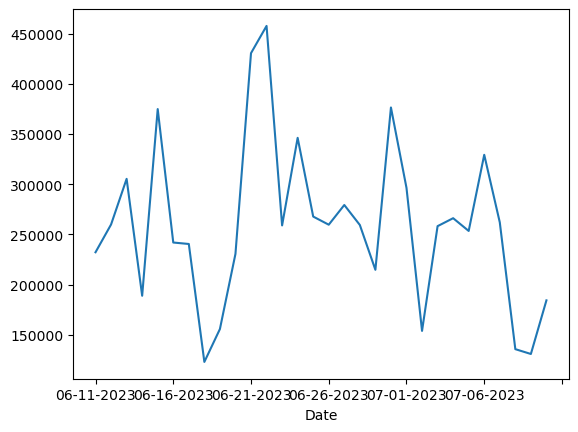

In [50]:
#reformat volume
exchgVolumeDataFrame['Volume'] = pd.to_numeric(exchgVolumeDataFrame['Volume'])

#set index
exchgVolumeDataFrame = exchgVolumeDataFrame.set_index('Date')

#plot
exchgVolumeDataFrame['Volume'].plot()

In [52]:
#get coin ticker by id / limited to 100, by page
mktSpecificData = cg.get_coin_ticker_by_id(id = 'bitcoin',
                                           exchange_id ='aave',
                                           page = 2,
                                           depth = True)
#dictionary to dataframe
mktSpecificDataFrame = pd.DataFrame.from_dict(mktSpecificData['tickers']
                                  ).sort_values('base').reset_index(drop=True)
mktSpecificDataFrame

,base,target,market,last,volume,cost_to_move_up_usd,cost_to_move_down_usd,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,ADA,BTC,"{'name': 'WhiteBIT', 'identifier': 'whitebit',...",0.000010,6.329940e+05,163786.418148,171740.299557,"{'btc': 1.0, 'eth': 16.193769, 'usd': 30258}","{'btc': 6.013443, 'eth': 97.38, 'usd': 181952}",green,0.210305,2023-07-10T15:33:02+00:00,2023-07-10T15:33:02+00:00,2023-07-10T15:33:02+00:00,False,False,https://whitebit.com/trade/ADA_BTC,None,cardano,bitcoin
1,ADA,BTC,"{'name': 'Bitfinex', 'identifier': 'bitfinex',...",0.000009,3.527196e+06,106744.424413,127638.433954,"{'btc': 1.0, 'eth': 16.193769, 'usd': 30258}","{'btc': 33.47309, 'eth': 542.056, 'usd': 1012815}",green,0.105263,2023-07-10T15:33:03+00:00,2023-07-10T15:33:03+00:00,2023-07-10T15:33:03+00:00,False,False,https://trading.bitfinex.com/t/ADA:BTC?type=ex...,None,cardano,bitcoin
2,ADA,BTC,"{'name': 'EXMO', 'identifier': 'exmo', 'has_tr...",0.000009,2.285182e+06,211051.277830,356887.719502,"{'btc': 1.0, 'eth': 16.193889, 'usd': 30253}","{'btc': 21.686379, 'eth': 351.187, 'usd': 656068}",green,0.420610,2023-07-10T15:31:31+00:00,2023-07-10T15:31:31+00:00,2023-07-10T15:31:31+00:00,False,False,https://exmo.com/en/trade/ADA_BTC,None,cardano,bitcoin
3,ADA,BTC,"{'name': 'XT.COM', 'identifier': 'xt', 'has_tr...",0.000010,3.217627e+05,112918.474801,178116.839576,"{'btc': 1.0, 'eth': 16.193769, 'usd': 30258}","{'btc': 3.02229, 'eth': 48.942271, 'usd': 91447}",green,0.231287,2023-07-10T15:33:36+00:00,2023-07-10T15:33:36+00:00,2023-07-10T15:33:36+00:00,False,False,https://www.xt.com/trade/ada_btc,None,cardano,bitcoin
4,ADA,BTC,"{'name': 'Binance', 'identifier': 'binance', '...",0.000009,8.219626e+06,237486.509015,261906.668315,"{'btc': 1.0, 'eth': 16.212476, 'usd': 30255}","{'btc': 77.922, 'eth': 1263, 'usd': 2357495}",green,0.105374,2023-07-10T14:49:56+00:00,2023-07-10T14:49:56+00:00,2023-07-10T14:49:56+00:00,False,False,https://www.binance.com/en/trade/ADA_BTC?ref=3...,None,cardano,bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,XRP,BTC,"{'name': 'Coinsbit', 'identifier': 'coinsbit',...",0.000016,9.144184e+05,200669.924966,189264.104641,"{'btc': 1.0, 'eth': 16.19378, 'usd': 30254}","{'btc': 14.228351, 'eth': 230.411, 'usd': 430471}",green,0.064144,2023-07-10T15:02:14+00:00,2023-07-10T15:02:14+00:00,2023-07-10T15:32:55+00:00,False,False,https://coinsbit.io/trade/XRP_BTC,None,ripple,bitcoin
96,XRP,BTC,"{'name': 'DigiFinex', 'identifier': 'digifinex...",0.000016,8.133260e+05,868363.034432,53828.350672,"{'btc': 1.0, 'eth': 16.19378, 'usd': 30254}","{'btc': 12.709845, 'eth': 205.82, 'usd': 384529}",green,0.377310,2023-07-10T15:32:49+00:00,2023-07-10T15:32:49+00:00,2023-07-10T15:32:49+00:00,False,False,https://www.digifinex.com/en-ww/trade/BTC/XRP,None,ripple,bitcoin
97,XRP,BTC,"{'name': 'Dex-Trade', 'identifier': 'dextrade'...",0.000016,4.518860e+05,138190.095819,137720.313278,"{'btc': 1.0, 'eth': 16.19378, 'usd': 30254}","{'btc': 7.031346, 'eth': 113.864, 'usd': 212729}",green,0.256410,2023-07-10T15:32:57+00:00,2023-07-10T15:32:57+00:00,2023-07-10T15:32:57+00:00,False,False,None,None,ripple,bitcoin
98,XRP,BTC,"{'name': 'Bitfinex', 'identifier': 'bitfinex',...",0.000016,1.205400e+06,287295.553134,312405.384411,"{'btc': 1.0, 'eth': 16.193769, 'usd': 30258}","{'btc': 18.816296, 'eth': 304.707, 'usd': 569336}",green,0.128287,2023-07-10T15:30:38+00:00,2023-07-10T15:30:38+00:00,2023-07-10T15:33:07+00:00,False,False,https://trading.bitfinex.com/t/XRP:BTC?type=ex...,None,ripple,bitcoin


In [53]:
#get coin history by SINGLE id
coinHistory = cg.get_coin_history_by_id(id = 'bitcoin',
                              date = dt.datetime.today().strftime('%d-%m-%Y'))
coinHistory

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 110814.23662362799,
   'ars': 7801052.2379610175,
   'aud': 450

In [57]:
#get daily historical data
dailyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin',
                               vs_currency = 'usd',
                               days = 'max')
dailyHistoricalData

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [59]:
#get hourly historical data
hourlyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin',
                               vs_currency = 'usd',
                               days = 90)
hourlyHistoricalData

{'prices': [[1681228877350, 30214.307177573563],
  [1681232512894, 30225.920267562975],
  [1681236080792, 30216.915656286754],
  [1681239661551, 30250.83260478154],
  [1681243254994, 30138.51321654413],
  [1681246869614, 30189.355047986835],
  [1681250499237, 30239.035844019814],
  [1681254074609, 30294.285119109303],
  [1681257668229, 30260.93610940865],
  [1681261241595, 30269.973830348576],
  [1681264880454, 30204.811594353832],
  [1681268450593, 29909.185993786305],
  [1681272039127, 29970.97676179108],
  [1681275607073, 30008.852839499283],
  [1681279210534, 29951.279758798635],
  [1681282870845, 29963.20279931688],
  [1681286520783, 30017.553260048844],
  [1681290108846, 29983.94700385204],
  [1681293693929, 30020.615187465235],
  [1681297282300, 30040.879680443755],
  [1681300881043, 30009.59523399315],
  [1681304472255, 30309.229461843606],
  [1681308079900, 30146.653274178367],
  [1681311632362, 30085.792748498076],
  [1681315244322, 29998.616956197235],
  [1681318870168, 3000

In [61]:
#get 5 minute historical data
fiveMinHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin',
                               vs_currency = 'usd',
                               days = 1)
fiveMinHistoricalData

{'prices': [[1688917239809, 30355.319979725256],
  [1688917538957, 30351.733751400494],
  [1688917878723, 30351.155317974528],
  [1688918136835, 30352.94033152462],
  [1688918488347, 30352.91352893151],
  [1688918714844, 30346.204133700452],
  [1688919032409, 30343.33122294657],
  [1688919311520, 30336.57841462139],
  [1688919621681, 30303.45946882655],
  [1688919947411, 30292.400620107757],
  [1688920267309, 30296.395056580917],
  [1688920534472, 30307.33252176346],
  [1688920820117, 30311.42448882709],
  [1688921097403, 30311.355809186676],
  [1688921395932, 30304.171097358176],
  [1688921734365, 30300.787517532197],
  [1688922021988, 30300.64925892177],
  [1688922317746, 30278.090473997072],
  [1688922615571, 30287.338593029774],
  [1688922925446, 30277.88413004536],
  [1688923255362, 30284.498004770237],
  [1688923542759, 30280.342553952774],
  [1688923861400, 30272.64190925018],
  [1688924107468, 30273.233537948036],
  [1688924406385, 30272.02429603494],
  [1688924745681, 30271.83

In [62]:
#input a range of timestamps to get data for - using predetermined frequency
chartRange = cg.get_coin_market_chart_range_by_id(id = 'bitcoin',
                                                  vs_currency = 'usd',
                                                  from_timestamp = 1392577232,
                                                  to_timestamp = 1422577232)
chartRange

{'prices': [[1392595200000, 645.14],
  [1392681600000, 625.01],
  [1392768000000, 620.99],
  [1392854400000, 593.89],
  [1392940800000, 582.75],
  [1393027200000, 571.06],
  [1393113600000, 622.97],
  [1393200000000, 572.39],
  [1393286400000, 489.31],
  [1393372800000, 567.25],
  [1393459200000, 586.28],
  [1393545600000, 567.2],
  [1393632000000, 560.11],
  [1393718400000, 561.35],
  [1393804800000, 585.79],
  [1393891200000, 675.0],
  [1393977600000, 658.24],
  [1394064000000, 654.55],
  [1394150400000, 617.62],
  [1394236800000, 610.37],
  [1394323200000, 636.17],
  [1394409600000, 621.17],
  [1394496000000, 624.23],
  [1394582400000, 638.07],
  [1394668800000, 639.03],
  [1394755200000, 629.67],
  [1394841600000, 638.07],
  [1394928000000, 629.55],
  [1395014400000, 623.705],
  [1395100800000, 612.622],
  [1395187200000, 610.636],
  [1395273600000, 592.07],
  [1395360000000, 582.303],
  [1395446400000, 561.22],
  [1395532800000, 567.779],
  [1395619200000, 571.418],
  [13957056000

<Axes: xlabel='Date'>

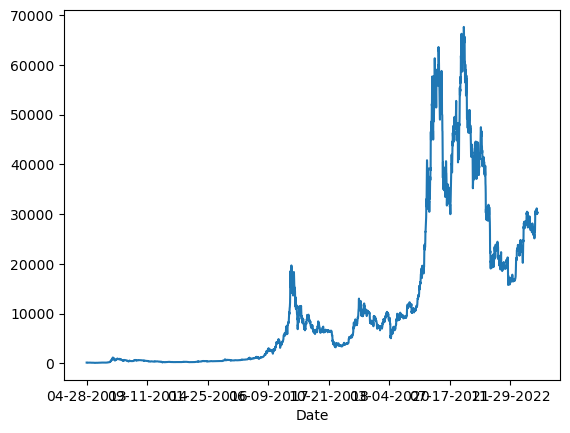

In [63]:
#list of lists to dataframe
dailyHistoricalDataFrame = pd.DataFrame(data = dailyHistoricalData['prices'],
                                        columns = ['Date', 'Price'])
#reformat date
dailyHistoricalDataFrame['Date'] = dailyHistoricalDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
dailyHistoricalDataFrame = dailyHistoricalDataFrame.set_index('Date')

#plot
dailyHistoricalDataFrame['Price'].plot()

In [69]:
#get OHLC data for preset range 1/7/14/30/90/180/365/max
#candle body width by date range
#1 - 2 days: 30 minutes
#3 - 30 days: 4 hours
#31 days and beyond: 4 days
ohlcData = cg.get_coin_ohlc_by_id(id = 'bitcoin',
                                  vs_currency = 'usd',
                                  days = '14')
#list to dataframe
ohlcDataFrame = pd.DataFrame(data = ohlcData,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
#reformat date
ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y %H:%M:%S'))
#set index
ohlcDataFrame = ohlcDataFrame.set_index('Date')
ohlcDataFrame

,Open,High,Low,Close
Date,,,,
06-26-2023 21:00:00,30443.0,30443.0,30109.0,30212.0
06-27-2023 01:00:00,30259.0,30259.0,30160.0,30238.0
06-27-2023 05:00:00,30286.0,30427.0,30286.0,30427.0
06-27-2023 09:00:00,30404.0,30404.0,30276.0,30276.0
06-27-2023 13:00:00,30412.0,30644.0,30375.0,30644.0
...,...,...,...,...
07-10-2023 01:00:00,30243.0,30243.0,30157.0,30193.0
07-10-2023 05:00:00,30170.0,30217.0,30105.0,30217.0
07-10-2023 09:00:00,30174.0,30174.0,30091.0,30091.0


In [71]:
#generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame.index,
                open=ohlcDataFrame['Open'],
                high=ohlcDataFrame['High'],
                low=ohlcDataFrame['Low'],
                close=ohlcDataFrame['Close'])])

#open figure in browser
plot(fig, auto_open=True)

#get coin info from contract address
coinInfoByAddress = cg.get_coin_info_from_contract_address_by_id(
                               id = 'binance-smart-chain',
                               contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                                  '29a091d735a204794041')

In [72]:
coinInfoByAddress['market_data'].keys()

dict_keys(['current_price', 'total_value_locked', 'mcap_to_tvl_ratio', 'fdv_to_tvl_ratio', 'roi', 'ath', 'ath_change_percentage', 'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'market_cap', 'market_cap_rank', 'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'market_cap_change_24h', 'market_cap_change_percentage_24h', 'price_change_24h_in_currency', 'price_change_percentage_1h_in_currency', 'price_change_percentage_24h_in_currency', 'price_change_percentage_7d_in_currency', 'price_change_percentage_14d_in_currency', 'price_change_percentage_30d_in_currency', 'price_change_percentage_60d_in_currency', 'price_change_percentage_200d_in_currency', 'price_change_percentage_1y_in_currency', 'market_cap_change_24h_in_currency', 'market

In [73]:
coinInfoByAddress['tickers']

[{'base': '0X1CE0C2827E2EF14D5C4F29A091D735A204794041',
  'target': '0XBB4CDB9CBD36B01BD1CBAEBF2DE08D9173BC095C',
  'market': {'name': 'Biswap',
   'identifier': 'biswap',
   'has_trading_incentive': False},
  'last': 0.0545807292361638,
  'volume': 1410.5895563410088,
  'converted_last': {'btc': 0.00044052, 'eth': 0.00713255, 'usd': 13.34},
  'converted_volume': {'btc': 0.64880744, 'eth': 10.504948, 'usd': 19645.41},
  'trust_score': 'green',
  'bid_ask_spread_percentage': 0.604777,
  'timestamp': '2023-07-10T15:34:57+00:00',
  'last_traded_at': '2023-07-10T15:34:57+00:00',
  'last_fetch_at': '2023-07-10T15:43:31+00:00',
  'is_anomaly': False,
  'is_stale': False,
  'trade_url': 'https://exchange.biswap.org/#/swap?inputCurrency=0x1ce0c2827e2ef14d5c4f29a091d735a204794041&outputCurrency=0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c',
  'token_info_url': None,
  'coin_id': 'binance-peg-avalanche',
  'target_coin_id': 'wbnb'},
 {'base': '0X1CE0C2827E2EF14D5C4F29A091D735A204794041',
  'target

In [74]:
#get historical market data - price, mkt cap, and volume / days = 1 to 'max'
#similar data points to .get_coin_market_chart_by_id()
coinChartData = cg.get_coin_market_chart_from_contract_address_by_id(
                            id = 'binance-smart-chain',
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            days = 'max')

coinChartDataRng = cg.get_coin_market_chart_range_from_contract_address_by_id(
                            id = 'binance-smart-chain',
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            from_timestamp = t.time()-100000,
                            to_timestamp = t.time())

In [75]:
coinChartData.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [77]:
#list of lists to dataframe
coinChartDataFrame = pd.DataFrame(data = coinChartData['prices'],
                                        columns = ['Date', 'Price'])
#reformat date
coinChartDataFrame['Date'] = coinChartDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
coinChartDataFrame = coinChartDataFrame.set_index('Date')
coinChartDataFrame

,Price
Date,
09-29-2021,66.365063
09-30-2021,66.365063
10-01-2021,64.055455
10-02-2021,68.667891
10-03-2021,72.164955
...,...
07-07-2023,12.448226
07-08-2023,12.702553
07-09-2023,13.630065


<Axes: xlabel='Date'>

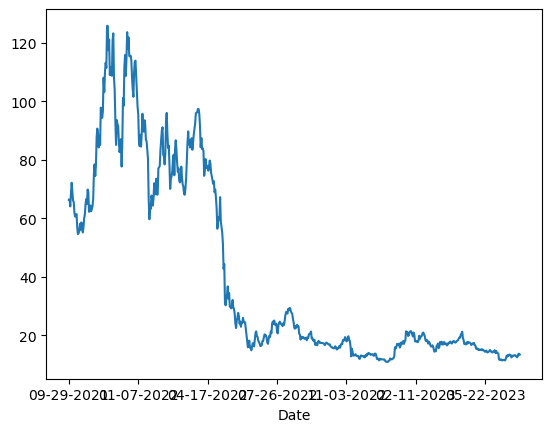

In [78]:
#plot
coinChartDataFrame['Price'].plot()

In [79]:
#get limited index data // name, id , market, last price
indexData = cg.get_indexes()

#get index ids, names
indexIds = cg.get_indexes_list()
indexIdsDataFrame = pd.DataFrame(indexIds).sort_values('id'
                                                       ).reset_index(drop=True)

#get all derivatives tickers
derivTickers = cg.get_derivatives()

#list to dataframe
derivTickersDataFrame = pd.DataFrame(derivTickers).sort_values('symbol'
                                                ).reset_index(drop=True)

#get derivatives exchanges + data
derivExchg = cg.get_derivatives_exchanges()
#list to dataframe
derivExchgDataFrame = pd.DataFrame(derivExchg).sort_values('id'
                                                ).reset_index(drop=True)

#get exchanges ordered by open interest
derivExchgDataFrame.sort_values('open_interest_btc',
                                       ascending = False
                                       ).reset_index(drop=True
                                       )[['id','open_interest_btc']].dropna()

,id,open_interest_btc
0,binance_futures,288646.48
1,bybit,166102.69
2,deepcoin_derivatives,142699.65
3,bitget_futures,125207.62
4,phemex_futures,118487.63
5,okex_swap,113336.46
6,prime_xbt,91433.25
7,whitebit_futures,69625.78
8,btse_futures,65699.61
9,bingx_futures,61026.17


In [81]:
#get exchange ids
derivExchgId = cg.get_derivatives_exchanges_list()

#list to dataframe
derivExchgIdDataFrame = pd.DataFrame(derivExchgId).sort_values('id'
                                                 ).reset_index(drop=True)

derivExchgIdDataFrame['id'].head(20)

0          aax_futures
1         acdx_futures
2           alpha_five
3      aqx_derivatives
4                bakkt
5              basefex
6        bibox_futures
7       bigone_futures
8         biki_futures
9      binance_futures
10       bingx_futures
11     bit_com_futures
12    bitfinex_futures
13    bitflyer_futures
14    bitforex_futures
15      bitget_futures
16     bithumb_futures
17     bitmart_futures
18      bitmax_futures
19              bitmex
Name: id, dtype: object

In [82]:
#get single exchange data by id + ticker data
print(cg.get_derivatives_exchanges_by_id(id = 'binance_futures'))
#with tickers
singleExchgData = cg.get_derivatives_exchanges_by_id(id = 'binance_futures',
                                                     include_tickers = 'all')
#ticker data list to dataframe
singleExchgTickerData = pd.DataFrame(singleExchgData['tickers']
                                     ).sort_values('symbol'
                                     ).reset_index(drop=True)
singleExchgTickerData

{'name': 'Binance (Futures)', 'open_interest_btc': 288646.48, 'trade_volume_24h_btc': '915683.56', 'number_of_perpetual_pairs': 253, 'number_of_futures_pairs': 31, 'image': 'https://assets.coingecko.com/markets/images/466/small/binance_futures.jpg?1568609512', 'year_established': 2019, 'country': None, 'description': '', 'url': 'https://www.binance.com/'}


,symbol,base,target,trade_url,contract_type,last,h24_percentage_change,index,index_basis_percentage,bid_ask_spread,funding_rate,open_interest_usd,h24_volume,converted_volume,converted_last,last_traded,expired_at
0,1000FLOKIUSDT,1000FLOKI,USDT,https://www.binance.com/en/futuresng/1000FLOKI...,perpetual,0.025,-0.649,0.024523,0.092,0.000408,0.010,0.000000e+00,3.414631e+08,"{'btc': '276.279347491891616983799603257917', ...","{'btc': '0.0000008091045062497543789891815', '...",1689004260,NaN
1,1000PEPEUSDT,1000PEPE,USDT,https://www.binance.com/en/futuresng/1000PEPEUSDT,perpetual,0.002,-3.395,0.001506,0.228,0.000167,-0.009,0.000000e+00,2.500287e+11,{'btc': '12404.6679845667014196317615935654911...,{'btc': '0.0000000496129673362859593287937701'...,1689004259,NaN
2,1000SHIBBUSD,1000SHIB,BUSD,https://www.binance.com/en/futuresng/1000SHIBBUSD,perpetual,0.008,-0.597,0.008487,-0.010,0.000118,0.010,0.000000e+00,4.357975e+08,{'btc': '137.807479494153784253497450708058352...,"{'btc': '0.000000316219080811335902675457744',...",1685608082,NaN
3,1000SHIBUSDT,1000SHIB,USDT,https://www.binance.com/en/futuresng/1000SHIBUSDT,perpetual,0.008,-0.813,0.007556,-0.064,0.000132,0.010,3.208961e+07,1.790240e+10,{'btc': '4470.22147805764720996001783075365649...,"{'btc': '0.000000249699558030791545287232707',...",1689004259,NaN
4,1000XECUSDT,1000XEC,USDT,https://www.binance.com/en/futuresng/1000XECUSDT,perpetual,0.034,2.406,0.034544,0.186,0.000290,-0.094,1.664727e+07,5.216422e+09,{'btc': '5939.8911152201144040747700687205568'...,"{'btc': '0.00000113869075002006248928763176', ...",1689004259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,YFIUSDT,YFI,USDT,https://www.binance.com/en/futuresng/YFIUSDT,perpetual,7008.000,0.100,7015.232813,0.103,0.000143,0.004,1.054990e+07,4.396634e+03,"{'btc': '1017.543402578368376365042811168064',...","{'btc': '0.231436913461154232161476896', 'eth'...",1689004259,NaN
270,ZECUSDT,ZEC,USDT,https://www.binance.com/en/futuresng/ZECUSDT,perpetual,28.780,-0.069,28.781494,0.005,0.000348,0.010,8.795254e+06,1.093661e+06,{'btc': '1039.47029926232786301630476669196396...,"{'btc': '0.00095045010979052779703300586', 'et...",1689004259,NaN
271,ZENUSDT,ZEN,USDT,https://www.binance.com/en/futuresng/ZENUSDT,perpetual,8.209,2.484,8.207102,-0.023,0.000122,0.004,5.272558e+05,2.622423e+06,"{'btc': '710.9375778647500907352974883887958',...","{'btc': '0.000271099546604254436617232283', 'e...",1689004259,NaN
272,ZILUSDT,ZIL,USDT,https://www.binance.com/en/futuresng/ZILUSDT,perpetual,0.020,-1.859,0.020073,0.066,0.000498,0.010,6.900829e+06,9.140106e+08,"{'btc': '605.5091144631888823096454781217515',...","{'btc': '0.00000066247495491306419765399922', ...",1689004259,NaN


In [83]:
#get exchange rates
exchangeRates = cg.get_exchange_rates()
#list to dataframe
exchangeRatesDataFrame = pd.DataFrame(exchangeRates['rates'])

#get trending search coins
trendingCoins = cg.get_search_trending()['coins']
trendingCoins

[{'item': {'id': 'apecoin',
   'coin_id': 24383,
   'name': 'ApeCoin',
   'symbol': 'APE',
   'market_cap_rank': 62,
   'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
   'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
   'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
   'slug': 'apecoin',
   'price_btc': 6.298774990344293e-05,
   'score': 0}},
 {'item': {'id': 'matic-network',
   'coin_id': 4713,
   'name': 'Polygon',
   'symbol': 'MATIC',
   'market_cap_rank': 13,
   'thumb': 'https://assets.coingecko.com/coins/images/4713/thumb/matic-token-icon.png?1624446912',
   'small': 'https://assets.coingecko.com/coins/images/4713/small/matic-token-icon.png?1624446912',
   'large': 'https://assets.coingecko.com/coins/images/4713/large/matic-token-icon.png?1624446912',
   'slug': 'polygon',
   'price_btc': 2.3583713179727603e-05,
   'score': 1}},
 {'item': {'id': 'roasthim

In [84]:
#get global cryptcurrency data // not too useful
globalData = cg.get_global()
globalData.keys()

dict_keys(['active_cryptocurrencies', 'upcoming_icos', 'ongoing_icos', 'ended_icos', 'markets', 'total_market_cap', 'total_volume', 'market_cap_percentage', 'market_cap_change_percentage_24h_usd', 'updated_at'])

In [85]:
#get global defi data
globalDefiData = cg.get_global_decentralized_finance_defi()

#get public companies bitcoin or ethereum holdings
publicBTC = cg.get_companies_public_treasury_by_coin_id(coin_id = 'bitcoin')
publicETH = cg.get_companies_public_treasury_by_coin_id(coin_id = 'ethereum')

In [86]:
publicBTC

{'total_holdings': 174374.4658,
 'total_value_usd': 5281164194.332401,
 'market_cap_dominance': 0.9,
 'companies': [{'name': 'MicroStrategy Inc.',
   'symbol': 'NASDAQ:MSTR',
   'country': 'US',
   'total_holdings': 129699,
   'total_entry_value_usd': 3975000000,
   'total_current_value_usd': 3928107889,
   'percentage_of_total_supply': 0.618},
  {'name': 'Marathon Digital Holdings',
   'symbol': 'NASDAQ:MARA',
   'country': 'US',
   'total_holdings': 10054,
   'total_entry_value_usd': 150000000,
   'total_current_value_usd': 304523081,
   'percentage_of_total_supply': 0.048},
  {'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 9000,
   'total_entry_value_usd': 173700000,
   'total_current_value_usd': 272577051,
   'percentage_of_total_supply': 0.043},
  {'name': 'Square Inc.',
   'symbol': 'NASDAQ:SQ',
   'country': 'US',
   'total_holdings': 8027,
   'total_entry_value_usd': 220000000,
   'total_current_value_usd': 243108443,
   'percentage_of

In [87]:
publicETH

{'total_holdings': 80026.1,
 'total_value_usd': 149702892.5037016,
 'market_cap_dominance': 0.07,
 'companies': [{'name': 'Coinbase',
   'symbol': 'NASDAQ: COIN',
   'country': 'US',
   'total_holdings': 48880,
   'total_entry_value_usd': 165400000,
   'total_current_value_usd': 91438822,
   'percentage_of_total_supply': 0.041},
  {'name': 'Meitu',
   'symbol': 'HKG:1357',
   'country': 'HK',
   'total_holdings': 31000,
   'total_entry_value_usd': 50500000,
   'total_current_value_usd': 57990951,
   'percentage_of_total_supply': 0.026},
  {'name': 'Mogo Inc.',
   'symbol': 'NASDAQ:MOGO',
   'country': 'CA',
   'total_holdings': 146,
   'total_entry_value_usd': 405880,
   'total_current_value_usd': 273118,
   'percentage_of_total_supply': 0.0}]}